# Unsupervised Learning in Python
Instructor: Ben Wilson, Chief Data Scientist @ lateral.io

---

*Paulo G. Martinez' notes for datacamp's course*
- started: 5-22-19
- continued: 10-14-19, 10-15-19, 10-23-19

## Unsupervised learning
a class of machine learning techniques for discovering patterns in data.
- e.g. **clustering** customers by their purchases
- Compressing the data using purchase patterns (**dimension reduction**)

## Supervised vs unsupervised learning
- **Supervised** learning finds patterns for a prediction task
- e.g. classify tumors as benign or cancerous based on measurements (*labels*)
- **Unsupervised** learning finds patterns in data *without* a specific prediction task in mind

## Iris dataset
Measurements of iris plants of 3 differenent species:

### *Let's take a quick look at the data set*
*seaborn has a convenient way to explore it*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris_seaborn = sns.load_dataset("iris")

In [3]:
type(iris_seaborn)

pandas.core.frame.DataFrame

In [4]:
iris_seaborn.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


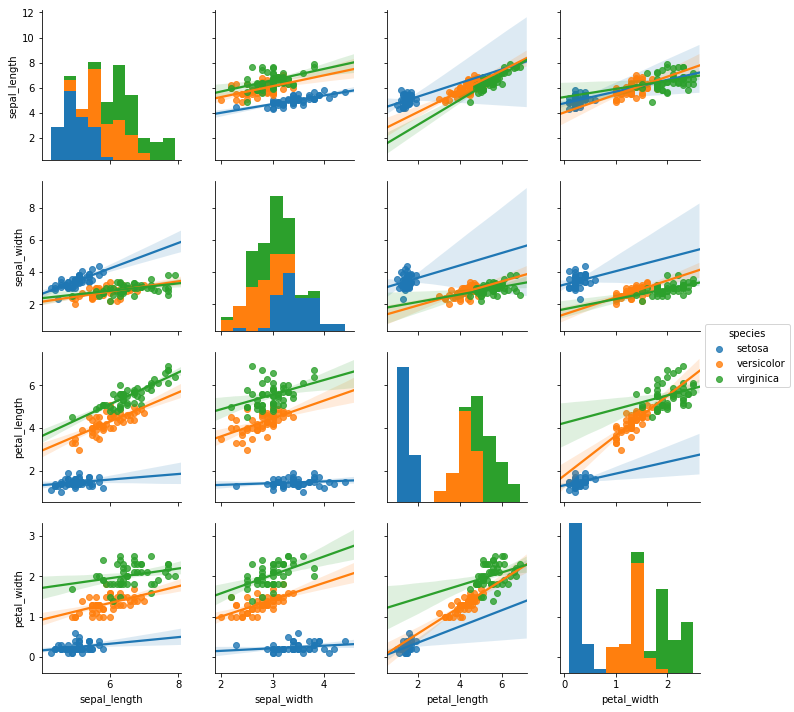

In [5]:
g = sns.pairplot(
    iris_seaborn, 
    hue = 'species', 
    kind = 'reg',
)

### *SKLearn has the data structured a bit differently*

In [6]:
# import the iris data set from sklearn
iris = datasets.load_iris()

In [7]:
type(iris)

sklearn.utils.Bunch

In [8]:
# looks like sklearn's "Bunch" is similar to a dict
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
print(iris['DESCR'], '\n')

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
print('Feature names\n', iris['feature_names'], '\n')
print('Target names\n', iris['target_names'], '\n')
for key in ['data', 'target']:
    print(key, '\n', iris[key][:5])

Feature names
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

Target names
 ['setosa' 'versicolor' 'virginica'] 

data 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target 
 [0 0 0 0 0]


## Arrays, features & samples
data is structured as 2D NumPy array
- Columns are measurements (the *features*)
- Rows represent iris plants (the *samples*)

## Iris data is 4-dimensional
- Iris samples are points in 4 dimensional space
- **Dimension** = number of features
    - 4 dimensions is too high to visualize but we can still gain insight by analyzing it.
    
## k-means clustering
- Finds clusters of samples
- Number of clusters must be specified
- implemented in **sklearn** library

## k-means clustering with scikit-learn
import it and specify the number of clusters we want to find (in our case three)

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=3, verbose=1)
# not sure what verbose will do but hopefully it will print some insightful info

In [13]:
samples = iris['data']
print(samples[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [14]:
# fit the model passing the array of samples
model.fit(samples)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 88.70586052631577
start iteration
done sorting
end inner loop
Iteration 1, inertia 81.26545514705883
start iteration
done sorting
end inner loop
Iteration 2, inertia 79.6309054945055
start iteration
done sorting
end inner loop
Iteration 3, inertia 78.94084142614602
start iteration
done sorting
end inner loop
Iteration 4, inertia 78.94084142614602
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 93.48591565876472
start iteration
done sorting
end inner loop
Iteration 1, inertia 79.4039
start iteration
done sorting
end inner loop
Iteration 2, inertia 78.94084142614602
start iteration
done sorting
end inner loop
Iteration 3, inertia 78.94084142614602
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 83.337713675213

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

### 🤔 *I wonder how the aglorithm works*
*Looks like the algorithm might iteratively "plant" random n-dimensional centroids and measure how well they "enclose" the data points (which I imagine may be something like measuring the distance from the centroid to each n-dimensional point) while reducing overlap between each cluster.*

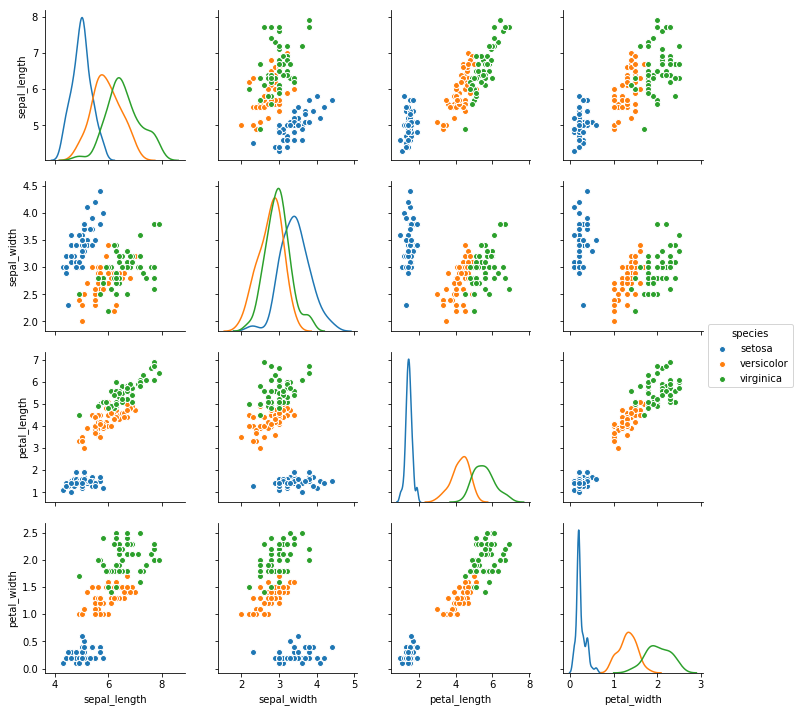

In [15]:
g = sns.pairplot(
    iris_seaborn, 
    hue = 'species', 
    diag_kind = 'kde',
)

***😆 Almost guessed it right!***

Turns out the algorithm does, iteratively: 
- randomly "plant" n-dimensional centroids
- categorizes/clusters the points by their nearest centroid
- then records the "variance" within each cluster (based on the euclidian distances between a point and its centroid)
it does this n times recording some aggregation of the variances as a measure of "goodness of fit." At the end of the iterations it outputs the centroids/clusters that resulted in the minimal aggregation of variances.

Here are some good links on it:
- [https://mubaris.com/posts/kmeans-clustering/]
    - consulted 05-23-2019, 9:07 am EST
- [K-Means Clustering CS229 Lecture Notes, by Andrew Ng, Stanford](http://cs229.stanford.edu/notes/cs229-notes7a.pdf)
    - consulted 05-23-2019, 9:09 am EST
    - and copied to this repo
- [In Depth: k-Means Clustering Repo, Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
    - forked, 05-23-2019, ca. 9 am EST

*Anyway, there are some gotcha's to watch out for but let's finish the dc (data camp) course before I decide what gaps I want to fill next.*

## back to data camp's video
- ## k-means clustering with scikit-learn

In [16]:
print(samples[:5])

model = KMeans(n_clusters=3)

model.fit(samples)
KMeans(algorithm='auto')

labels = model.predict(samples)

print(labels)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Let's see how sklearn did compared to sns labels:

In [17]:
list(zip(iris_seaborn.species, labels))

[('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('setosa', 1),
 ('versicolor', 0),
 ('versicolor', 0),
 ('versicolor', 2),
 ('versicolor', 0),
 ('versicolor', 0),
 ('versicolor', 0),
 ('versicolor', 0),
 ('versicolor', 0),
 ('versicolor', 0),
 ('versicolor', 0),


Interesting, from visual inspection it looks like the model had some trouble between virginica and versicolor but, just a little trouble. The performance over all is quite good.

## Cluster labels for new samples
- New samples can be assigned to existing clusters
- k-means remembers the means of each cluster (the "centroids")
    - *although, it looks like this would be a case of predicting that does not "learn as it goes along." I.e. it appears the "centroids" are not re-calculated with the "new" samples as input.*
    
## Cluster labels for new samples

In [18]:
new_samples = [
    [5.7, 4.4, 1.5, 0.4],
    [6.5, 3.0, 5.5, 1.8],
    [5.8, 2.7, 5.1, 1.9]
]
new_labels = model.predict(new_samples)
print(new_labels)

[1 2 0]


***Thoughts on generating my own simulated samples***

My current intuition is that a "normal distribution" can be thought of as the collection of "noisy" measurements of a pure signal. 
- i.e. that the mean is the pure signal
- and the variance of any given measurement is a function of "noise" in that measurement. 
    - noisier samples would have longer tails in their histogram
    - cleaner samples would have shorter tails

***example of a generic normal distribution:*** 

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


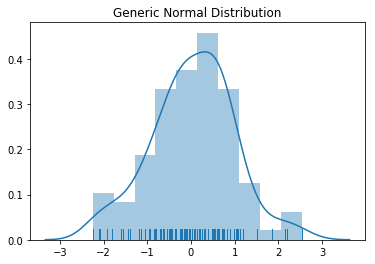

In [19]:
sns.distplot(np.random.normal(0, 1, 100), rug = True)
plt.title('Generic Normal Distribution')
plt.show()
# 0 being the mean of the normal distritbution
# 1 being the standard deviation of the normal dist.
# 100 being the number of elements in the generated array

***I was thinking of simulating my own iris samples.***
- where all that would be required would be to find a mean and standard deviation.
    - each simulated sample could be a value randomly selected from the range of the distribution. 
    
- but I don't have just one signal. 
- In fact I don't even have one signal per species. 
- **I have one signal per species per dimension.**

***see below:***

In [20]:
for species in iris_seaborn.species.unique():
    print(species.upper() + '\n' + '-'*len(species))
    print(iris_seaborn[iris_seaborn.species == species].describe())
    print('')

SETOSA
------
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

VERSICOLOR
----------
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%

So, to simulate an entire other data set I would have to simulate samples for every level of signal granualirty I cared about.

For example, compare below the real and simulated samples

***Distribution of Setosa Sepal Lengths from Real Data***

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


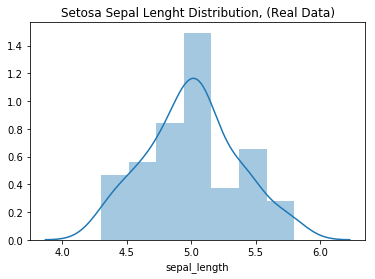

In [21]:
sns.distplot(
    iris_seaborn.sepal_length[iris_seaborn.species == 'setosa'],
)
plt.title('Setosa Sepal Lenght Distribution, (Real Data)')
plt.show()

***Distribution of Simulated Setosa Sepal Lenghts***

50 measurements
setosa sepal lenght mean:  5.005999999999999
setosa sepal length std:  0.348946987377739


/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


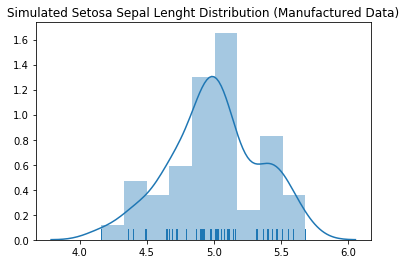

In [22]:
setosa_sepal_length_mean = np.mean(iris_seaborn.sepal_length[iris_seaborn.species == 'setosa'])
setosa_sepal_length_std = np.std(iris_seaborn.sepal_length[iris_seaborn.species == 'setosa'])

print(len(iris_seaborn.sepal_length[iris_seaborn.species == 'setosa']), 'measurements')
print('setosa sepal lenght mean: ', setosa_sepal_length_mean)
print('setosa sepal length std: ', setosa_sepal_length_std)

simulated_setosa_sepal_samples = np.random.normal()
sns.distplot(np.random.normal(setosa_sepal_length_mean,
                              setosa_sepal_length_std,
                              50), rug = True)
plt.title('Simulated Setosa Sepal Lenght Distribution (Manufactured Data)')
plt.show()

***Ultimately, it's an interesting thought but too much of a digression. Let's get back to the course***

# How many clusters
visual inspection can give us intuitive insight into clustering

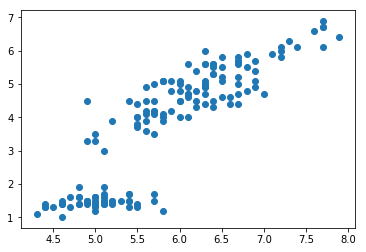

In [23]:
xs = samples[:,0] # every row, but only the first variable
ys = samples[:, 2]
plt.scatter(xs, ys)
plt.show()

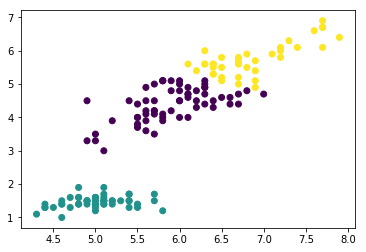

In [24]:
xs = samples[:,0] # every row, but only the first variable
ys = samples[:, 2]
plt.scatter(xs, ys, c = labels)
plt.show()

## Clustering 2D points
Clustering 2D points
From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. 
- You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. 
- After the model has been fit, you'll obtain the cluster labels for some new points using the `.predict()` method.

You are given the array `points` from the previous exercise, and also an array `new_points`.

In [25]:
points = [[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]]

In [26]:
new_points = [[ 4.00233332e-01, -1.26544471e+00],
       [ 8.03230370e-01,  1.28260167e+00],
       [-1.39507552e+00,  5.57292921e-02],
       [-3.41192677e-01, -1.07661994e+00],
       [ 1.54781747e+00,  1.40250049e+00],
       [ 2.45032018e-01, -4.83442328e-01],
       [ 1.20706886e+00,  8.88752605e-01],
       [ 1.25132628e+00,  1.15555395e+00],
       [ 1.81004415e+00,  9.65530731e-01],
       [-1.66963401e+00, -3.08103509e-01],
       [-7.17482105e-02, -9.37939700e-01],
       [ 6.82631927e-01,  1.10258160e+00],
       [ 1.09039598e+00,  1.43899529e+00],
       [-1.67645414e+00, -5.04557049e-01],
       [-1.84447804e+00,  4.52539544e-02],
       [ 1.24234851e+00,  1.02088661e+00],
       [-1.86147041e+00,  6.38645811e-03],
       [-1.46044943e+00,  1.53252383e-01],
       [ 4.98981817e-01,  8.98006058e-01],
       [ 9.83962244e-01,  1.04369375e+00],
       [-1.83136742e+00, -1.63632835e-01],
       [ 1.30622617e+00,  1.07658717e+00],
       [ 3.53420328e-01, -7.51320218e-01],
       [ 1.13957970e+00,  1.54503860e+00],
       [ 2.93995694e-01, -1.26135005e+00],
       [-1.14558225e+00, -3.78709636e-02],
       [ 1.18716105e+00,  6.00240663e-01],
       [-2.23211946e+00,  2.30475094e-01],
       [-1.28320430e+00, -3.93314568e-01],
       [ 4.94296696e-01, -8.83972009e-01],
       [ 6.31834930e-02, -9.11952228e-01],
       [ 9.35759539e-01,  8.66820685e-01],
       [ 1.58014721e+00,  1.03788392e+00],
       [ 1.06304960e+00,  1.02706082e+00],
       [-1.39732536e+00, -5.05162249e-01],
       [-1.09935240e-01, -9.08113619e-01],
       [ 1.17346758e+00,  9.47501092e-01],
       [ 9.20084511e-01,  1.45767672e+00],
       [ 5.82658956e-01, -9.00086832e-01],
       [ 9.52772328e-01,  8.99042386e-01],
       [-1.37266956e+00, -3.17878215e-02],
       [ 2.12706760e-02, -7.07614194e-01],
       [ 3.27049052e-01, -5.55998107e-01],
       [-1.71590267e+00,  2.15222266e-01],
       [ 5.12516209e-01, -7.60128245e-01],
       [ 1.13023469e+00,  7.22451122e-01],
       [-1.43074310e+00, -3.42787511e-01],
       [-1.82724625e+00,  1.17657775e-01],
       [ 1.41801350e+00,  1.11455080e+00],
       [ 1.26897304e+00,  1.41925971e+00],
       [ 8.04076494e-01,  1.63988557e+00],
       [ 8.34567752e-01,  1.09956689e+00],
       [-1.24714732e+00, -2.23522320e-01],
       [-1.29422537e+00,  8.18770024e-02],
       [-2.27378316e-01, -4.13331387e-01],
       [ 2.18830387e-01, -4.68183120e-01],
       [-1.22593414e+00,  2.55599147e-01],
       [-1.31294033e+00, -4.28892070e-01],
       [-1.33532382e+00,  6.52053776e-01],
       [-3.01100233e-01, -1.25156451e+00],
       [ 2.02778356e-01, -9.05277445e-01],
       [ 1.01357784e+00,  1.12378981e+00],
       [ 8.18324394e-01,  8.60841257e-01],
       [ 1.26181556e+00,  1.46613744e+00],
       [ 4.64867724e-01, -7.97212459e-01],
       [ 3.60908898e-01,  8.44106720e-01],
       [-2.15098310e+00, -3.69583937e-01],
       [ 1.05005281e+00,  8.74181364e-01],
       [ 1.06580074e-01, -7.49268153e-01],
       [-1.73945723e+00,  2.52183577e-01],
       [-1.12017687e-01, -6.52469788e-01],
       [ 5.16618951e-01, -6.41267582e-01],
       [ 3.26621787e-01, -8.80608015e-01],
       [ 1.09017759e+00,  1.10952558e+00],
       [ 3.64459576e-01, -6.94215622e-01],
       [-1.90779318e+00,  1.87383674e-01],
       [-1.95601829e+00,  1.39959126e-01],
       [ 3.18541701e-01, -4.05271704e-01],
       [ 7.36512699e-01,  1.76416255e+00],
       [-1.44175162e+00, -5.72320429e-02],
       [ 3.21757168e-01, -5.34283821e-01],
       [-1.37317305e+00,  4.64484644e-02],
       [ 6.87225910e-02, -1.10522944e+00],
       [ 9.59314218e-01,  6.52316210e-01],
       [-1.62641919e+00, -5.62423280e-01],
       [ 1.06788305e+00,  7.29260482e-01],
       [-1.79643547e+00, -9.88307418e-01],
       [-9.88628377e-02, -6.81198092e-02],
       [-1.05135700e-01,  1.17022143e+00],
       [ 8.79964699e-01,  1.25340317e+00],
       [ 9.80753407e-01,  1.15486539e+00],
       [-8.33224966e-02, -9.24844368e-01],
       [ 8.48759673e-01,  1.09397425e+00],
       [ 1.32941649e+00,  1.13734563e+00],
       [ 3.23788068e-01, -7.49732451e-01],
       [-1.52610970e+00, -2.49016929e-01],
       [-1.48598116e+00, -2.68828608e-01],
       [-1.80479553e+00,  1.87052700e-01],
       [-2.01907347e+00, -4.49511651e-01],
       [ 2.87202402e-01, -6.55487415e-01],
       [ 8.22295102e-01,  1.38443234e+00],
       [-3.56997036e-02, -8.01825807e-01],
       [-1.66955440e+00, -1.38258505e-01],
       [-1.78226821e+00,  2.93353033e-01],
       [ 7.25837138e-01, -6.23374024e-01],
       [ 3.88432593e-01, -7.61283497e-01],
       [ 1.49002783e+00,  7.95678671e-01],
       [ 6.55423228e-04, -7.40580702e-01],
       [-1.34533116e+00, -4.75629937e-01],
       [-8.03845106e-01, -3.09943013e-01],
       [-2.49041295e-01, -1.00662418e+00],
       [-1.41095118e+00, -7.06744127e-02],
       [-1.75119594e+00, -3.00491336e-01],
       [-1.27942724e+00,  1.73774600e-01],
       [ 3.35028183e-01,  6.24761151e-01],
       [ 1.16819649e+00,  1.18902251e+00],
       [ 7.15210457e-01,  9.26077419e-01],
       [ 1.30057278e+00,  9.16349565e-01],
       [-1.21697008e+00,  1.10039477e-01],
       [-1.70707935e+00, -5.99659536e-02],
       [ 1.20730655e+00,  1.05480463e+00],
       [ 1.86896009e-01, -9.58047234e-01],
       [ 8.03463471e-01,  3.86133140e-01],
       [-1.73486790e+00, -1.49831913e-01],
       [ 1.31261499e+00,  1.11802982e+00],
       [ 4.04993148e-01, -5.10900347e-01],
       [-1.93267968e+00,  2.20764694e-01],
       [ 6.56004799e-01,  9.61887161e-01],
       [-1.40588215e+00,  1.17134403e-01],
       [-1.74306264e+00, -7.47473959e-02],
       [ 5.43745412e-01,  1.47209224e+00],
       [-1.97331669e+00, -2.27124493e-01],
       [ 1.53901171e+00,  1.36049081e+00],
       [-1.48323452e+00, -4.90302063e-01],
       [ 3.86748484e-01, -1.26173400e+00],
       [ 1.17015716e+00,  1.18549415e+00],
       [-8.05381721e-02, -3.21923627e-01],
       [-6.82273156e-02, -8.52825887e-01],
       [ 7.13500028e-01,  1.27868520e+00],
       [-1.85014378e+00, -5.03490558e-01],
       [ 6.36085266e-02, -1.41257040e+00],
       [ 1.52966062e+00,  9.66056572e-01],
       [ 1.62165714e-01, -1.37374843e+00],
       [-3.23474497e-01, -7.06620269e-01],
       [-1.51768993e+00,  1.87658302e-01],
       [ 8.88895911e-01,  7.62237161e-01],
       [ 4.83164032e-01,  8.81931869e-01],
       [-5.52997766e-02, -7.11305016e-01],
       [-1.57966441e+00, -6.29220313e-01],
       [ 5.51308645e-02, -8.47206763e-01],
       [-2.06001582e+00,  5.87697787e-02],
       [ 1.11810855e+00,  1.30254175e+00],
       [ 4.87016164e-01, -9.90143937e-01],
       [-1.65518042e+00, -1.69386383e-01],
       [-1.44349738e+00,  1.90299243e-01],
       [-1.70074547e-01, -8.26736022e-01],
       [-1.82433979e+00, -3.07814626e-01],
       [ 1.03093485e+00,  1.26457691e+00],
       [ 1.64431169e+00,  1.27773115e+00],
       [-1.47617693e+00,  2.60783872e-02],
       [ 1.00953067e+00,  1.14270181e+00],
       [-1.45285636e+00, -2.55216207e-01],
       [-1.74092917e+00, -8.34443177e-02],
       [ 1.22038299e+00,  1.28699961e+00],
       [ 9.16925397e-01,  7.32070275e-01],
       [-1.60754185e-03, -7.26375571e-01],
       [ 8.93841238e-01,  8.41146643e-01],
       [ 6.33791961e-01,  1.00915134e+00],
       [-1.47927075e+00, -6.99781936e-01],
       [ 5.44799374e-02, -1.06441970e+00],
       [-1.51935568e+00, -4.89276929e-01],
       [ 2.89939026e-01, -7.73145523e-01],
       [-9.68154061e-03, -1.13302207e+00],
       [ 1.13474639e+00,  9.71541744e-01],
       [ 5.36421406e-01, -8.47906388e-01],
       [ 1.14759864e+00,  6.89915205e-01],
       [ 5.73291902e-01,  7.90802710e-01],
       [ 2.12377397e-01, -6.07569808e-01],
       [ 5.26579548e-01, -8.15930264e-01],
       [-2.01831641e+00,  6.78650740e-02],
       [-2.35512624e-01, -1.08205132e+00],
       [ 1.59274780e-01, -6.00717261e-01],
       [ 2.28120356e-01, -1.16003549e+00],
       [-1.53658378e+00,  8.40798808e-02],
       [ 1.13954609e+00,  6.31782001e-01],
       [ 1.01119255e+00,  1.04360805e+00],
       [-1.42039867e-01, -4.81230337e-01],
       [-2.23120182e+00,  8.49162905e-02],
       [ 1.25554811e-01, -1.01794793e+00],
       [-1.72493509e+00, -6.94426177e-01],
       [-1.60434630e+00,  4.45550868e-01],
       [ 7.37153979e-01,  9.26560744e-01],
       [ 6.72905271e-01,  1.13366030e+00],
       [ 1.20066456e+00,  7.26273093e-01],
       [ 7.58747209e-02, -9.83378326e-01],
       [ 1.28783262e+00,  1.18088601e+00],
       [ 1.06521930e+00,  1.00714746e+00],
       [ 1.05871698e+00,  1.12956519e+00],
       [-1.12643410e+00,  1.66787744e-01],
       [-1.10157218e+00, -3.64137806e-01],
       [ 2.35118217e-01, -1.39769949e-01],
       [ 1.13853795e+00,  1.01018519e+00],
       [ 5.31205654e-01, -8.81990792e-01],
       [ 4.33085936e-01, -7.64059042e-01],
       [-4.48926156e-03, -1.30548411e+00],
       [-1.76348589e+00, -4.97430739e-01],
       [ 1.36485681e+00,  5.83404699e-01],
       [ 5.66923900e-01,  1.51391963e+00],
       [ 1.35736826e+00,  6.70915318e-01],
       [ 1.07173397e+00,  6.11990884e-01],
       [ 1.00106915e+00,  8.93815326e-01],
       [ 1.33091007e+00,  8.79773879e-01],
       [-1.79603740e+00, -3.53883973e-02],
       [-1.27222979e+00,  4.00156642e-01],
       [ 8.47480603e-01,  1.17032364e+00],
       [-1.50989129e+00, -7.12318330e-01],
       [-1.24953576e+00, -5.57859730e-01],
       [-1.27717973e+00, -5.99350550e-01],
       [-1.81946743e+00,  7.37057673e-01],
       [ 1.19949867e+00,  1.56969386e+00],
       [-1.25543847e+00, -2.33892826e-01],
       [-1.63052058e+00,  1.61455865e-01],
       [ 1.10611305e+00,  7.39698224e-01],
       [ 6.70193192e-01,  8.70567001e-01],
       [ 3.69670156e-01, -6.94645306e-01],
       [-1.26362293e+00, -6.99249285e-01],
       [-3.66687507e-01, -1.35310260e+00],
       [ 2.44032147e-01, -6.59470793e-01],
       [-1.27679142e+00, -4.85453412e-01],
       [ 3.77473612e-02, -6.99251605e-01],
       [-2.19148539e+00, -4.91199500e-01],
       [-2.93277777e-01, -5.89488212e-01],
       [-1.65737397e+00, -2.98337786e-01],
       [ 7.36638861e-01,  5.78037057e-01],
       [ 1.13709081e+00,  1.30119754e+00],
       [-1.44146601e+00,  3.13934680e-02],
       [ 5.92360708e-01,  1.22545114e+00],
       [ 6.51719414e-01,  4.92674894e-01],
       [ 5.94559139e-01,  8.25637315e-01],
       [-1.87900722e+00, -5.21899626e-01],
       [ 2.15225041e-01, -1.28269851e+00],
       [ 4.99145965e-01, -6.70268634e-01],
       [-1.82954176e+00, -3.39269731e-01],
       [ 7.92721403e-01,  1.33785606e+00],
       [ 9.54363372e-01,  9.80396626e-01],
       [-1.35359846e+00,  1.03976340e-01],
       [ 1.05595062e+00,  8.07031927e-01],
       [-1.94311010e+00, -1.18976964e-01],
       [-1.39604137e+00, -3.10095976e-01],
       [ 1.28977624e+00,  1.01753365e+00],
       [-1.59503139e+00, -5.40574609e-01],
       [-1.41994046e+00, -3.81032569e-01],
       [-2.35569801e-02, -1.10133702e+00],
       [-1.26038568e+00, -6.93273886e-01],
       [ 9.60215981e-01, -8.11553694e-01],
       [ 5.51803308e-01, -1.01793176e+00],
       [ 3.70185085e-01, -1.06885468e+00],
       [ 8.25529207e-01,  8.77007060e-01],
       [-1.87032595e+00,  2.87507199e-01],
       [-1.56260769e+00, -1.89196712e-01],
       [-1.26346548e+00, -7.74725237e-01],
       [-6.33800421e-02, -7.59400611e-01],
       [ 8.85298280e-01,  8.85620519e-01],
       [-1.43324686e-01, -1.16083678e+00],
       [-1.83908725e+00, -3.26655515e-01],
       [ 2.74709229e-01, -1.04546829e+00],
       [-1.45703573e+00, -2.91842036e-01],
       [-1.59048842e+00,  1.66063031e-01],
       [ 9.25549284e-01,  7.41406406e-01],
       [ 1.97245469e-01, -7.80703225e-01],
       [ 2.88401697e-01, -8.32425551e-01],
       [ 7.24141618e-01, -7.99149200e-01],
       [-1.62658639e+00, -1.80005543e-01],
       [ 5.84481588e-01,  1.13195640e+00],
       [ 1.02146732e+00,  4.59657799e-01],
       [ 8.65050554e-01,  9.57714887e-01],
       [ 3.98717766e-01, -1.24273147e+00],
       [ 8.62234892e-01,  1.10955561e+00],
       [-1.35999430e+00,  2.49942654e-02],
       [-1.19178505e+00, -3.82946323e-02],
       [ 1.29392424e+00,  1.10320509e+00],
       [ 1.25679630e+00, -7.79857582e-01],
       [ 9.38040302e-02, -5.53247258e-01],
       [-1.73512175e+00, -9.76271667e-02],
       [ 2.23153587e-01, -9.43474351e-01],
       [ 4.01989100e-01, -1.10963051e+00],
       [-1.42244158e+00,  1.81914703e-01],
       [ 3.92476267e-01, -8.78426277e-01],
       [ 1.25181875e+00,  6.93614996e-01],
       [ 1.77481317e-02, -7.20304235e-01],
       [-1.87752521e+00, -2.63870424e-01],
       [-1.58063602e+00, -5.50456344e-01],
       [-1.59589493e+00, -1.53932892e-01],
       [-1.01829770e+00,  3.88542370e-02],
       [ 1.24819659e+00,  6.60041803e-01],
       [-1.25551377e+00, -2.96172009e-02],
       [-1.41864559e+00, -3.58230179e-01],
       [ 5.25758326e-01,  8.70500543e-01],
       [ 5.55599988e-01,  1.18765072e+00],
       [ 2.81344439e-02, -6.99111314e-01]]

In [27]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[0 1 2 0 1 0 1 1 1 2 0 1 1 2 2 1 2 2 1 1 2 1 0 1 0 2 1 2 2 0 0 1 1 1 2 0 1
 1 0 1 2 0 0 2 0 1 2 2 1 1 1 1 2 2 0 0 2 2 2 0 0 1 1 1 0 1 2 1 0 2 0 0 0 1
 0 2 2 0 1 2 0 2 0 1 2 1 2 0 1 1 1 0 1 1 0 2 2 2 2 0 1 0 2 2 0 0 1 0 2 2 0
 2 2 2 1 1 1 1 2 2 1 0 1 2 1 0 2 1 2 2 1 2 1 2 0 1 0 0 1 2 0 1 0 0 2 1 1 0
 2 0 2 1 0 2 2 0 2 1 1 2 1 2 2 1 1 0 1 1 2 0 2 0 0 1 0 1 1 0 0 2 0 0 0 2 1
 1 0 2 0 2 2 1 1 1 0 1 1 1 2 2 0 1 0 0 0 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2
 1 1 0 2 0 0 2 0 2 0 2 1 1 2 1 1 1 2 0 0 2 1 1 2 1 2 2 1 2 2 0 2 0 0 0 1 2
 2 2 0 1 0 2 0 2 2 1 0 0 0 2 1 1 1 0 1 2 2 1 0 0 2 0 0 2 0 1 0 2 2 2 2 1 2
 2 1 1 0]


### Inspect your clustering
Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so `new_points` is an array of points and `labels` is the array of their cluster labels.

In [28]:
new_points

[[0.400233332, -1.26544471],
 [0.80323037, 1.28260167],
 [-1.39507552, 0.0557292921],
 [-0.341192677, -1.07661994],
 [1.54781747, 1.40250049],
 [0.245032018, -0.483442328],
 [1.20706886, 0.888752605],
 [1.25132628, 1.15555395],
 [1.81004415, 0.965530731],
 [-1.66963401, -0.308103509],
 [-0.0717482105, -0.9379397],
 [0.682631927, 1.1025816],
 [1.09039598, 1.43899529],
 [-1.67645414, -0.504557049],
 [-1.84447804, 0.0452539544],
 [1.24234851, 1.02088661],
 [-1.86147041, 0.00638645811],
 [-1.46044943, 0.153252383],
 [0.498981817, 0.898006058],
 [0.983962244, 1.04369375],
 [-1.83136742, -0.163632835],
 [1.30622617, 1.07658717],
 [0.353420328, -0.751320218],
 [1.1395797, 1.5450386],
 [0.293995694, -1.26135005],
 [-1.14558225, -0.0378709636],
 [1.18716105, 0.600240663],
 [-2.23211946, 0.230475094],
 [-1.2832043, -0.393314568],
 [0.494296696, -0.883972009],
 [0.063183493, -0.911952228],
 [0.935759539, 0.866820685],
 [1.58014721, 1.03788392],
 [1.0630496, 1.02706082],
 [-1.39732536, -0.50516224

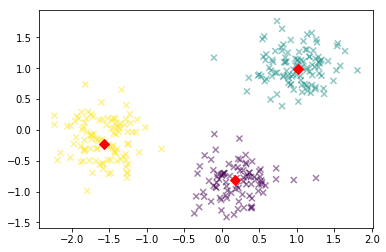

In [29]:
# Import pyplot
from matplotlib import pyplot as plt

# Assign the columns of new_points: xs and ys
new_points = np.array(new_points)

xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5, marker = 'x')

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, c = 'red', marker='D', s=50)
plt.show()


In [30]:
centroids

array([[ 0.18034887, -0.81701955],
       [ 1.01378685,  0.98288627],
       [-1.57568905, -0.22531944]])

# Evaluating a clustering
- Can check correspondence with existing labels
    - e.g. iris species
- ... but what if there are no existing labels?
    - e.g. species to check against?
- Measure of quality of a clustering
- Informs choice of how many clusters to look for

## Iris: clustering vs species
- k-means found 3 clusters amongst the iris samples
- Do the clusters correspond to the species?

## Cross tabulation with pandas
- clusters vs species is a "cross-tabulation"

In [31]:
species = iris_seaborn.species.values

In [32]:
samples = iris['data']
model = KMeans(n_clusters=3)
model.fit(samples)
KMeans(algorithm='auto')
labels = model.predict(samples)

df = pd.DataFrame({'labels': labels, 'species': species})

df.head(3)

,labels,species
0,1,setosa
1,1,setosa
2,1,setosa


In [33]:
pd.crosstab(df['labels'], df['species'])

species,setosa,versicolor,virginica
labels,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Measuring clustering quality
- using only samples and their cluster lables
- a good clustering has tight clusters
- ... and samples in each cluster bunched together

## Inertia measures clustering quality
- Measures how spread out the clusters are (*lower* is betteer)
- Distance from each sample to centroid of its cluster
    - *sounds like a euclidean analogue for variance*
    
**inertia is measured automatically by** `sklearn.cluster`'s `KMeans`

- k-means attempts to minimize the intertia when choosing clusters

In [34]:
model.inertia_

78.94084142614602

#### compare the inertia of different proposed clusters for iris

clusters: 1 inertia 680.8244
clusters: 2 inertia 152.36870647733906
clusters: 3 inertia 78.94084142614602
clusters: 4 inertia 57.31787321428571
clusters: 5 inertia 46.53558205128205
clusters: 6 inertia 38.930963049671746
clusters: 7 inertia 34.299985543844244
clusters: 8 inertia 30.324232174688056
clusters: 9 inertia 27.963035714285716
clusters: 10 inertia 26.27717676767677


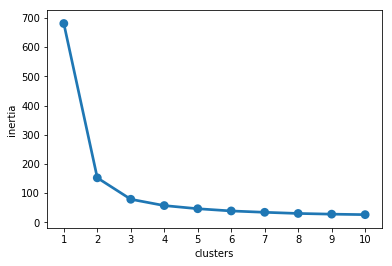

In [35]:
xs = []
ys = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(samples)
    print(f'clusters: {i} inertia {model.inertia_}')
    xs.append(i)
    ys.append(model.inertia_)

fit_df = pd.DataFrame({'clusters': xs, 'inertia': ys})
sns.pointplot(x = 'clusters', y = 'inertia', data = fit_df)
plt.show()

***Notice that inertia continues to decrease. Contrary to our desire to confirm three species only***
- I also noticed that the decrease is assymptotical. 
    - and perhaps the optimal number of clusters can be selected by a threshold ratio of delta_inertia/delta_clusters
    
### an "elbow" in the inertia plot
- where inertia begins to decrease "more slowly"

## How many clusters of grain?
In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array `samples` containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

`KMeans` and PyPlot (`plt`) have already been imported for you.

This dataset was sourced from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/seeds)

In [36]:
seeds_df = pd.read_csv('data/seeds_dataset.txt', 
            header = None, 
            index_col = None, 
            delim_whitespace=True,
            names = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coefficient', 'lenght_of_kernel_groove', 'unknown']
           )
seeds_df.head(3)


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,lenght_of_kernel_groove,unknown
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


In [37]:
seeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area                       210 non-null float64
perimeter                  210 non-null float64
compactness                210 non-null float64
kernel_length              210 non-null float64
kernel_width               210 non-null float64
asymmetry_coefficient      210 non-null float64
lenght_of_kernel_groove    210 non-null float64
unknown                    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [38]:
seeds_df.unknown.value_counts()

3    70
2    70
1    70
Name: unknown, dtype: int64

In [39]:
samples = seeds_df.drop(columns = 'unknown').values
samples[:5]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ]])

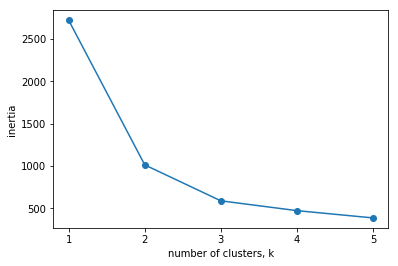

In [40]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


**This data set also suggests 3 clusters** due to the "slow decrease in inertia" between k = 3 and k = 4

### Evaluating the grain clustering
In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain `samples`, and a list `varieties` giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [41]:
varieties = seeds_df.unknown.map(
    {1:'Kama', 2: 'Rosa', 3: 'Canadian'}
)
print(varieties.values)

['Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama'
 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama'
 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama'
 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama'
 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama'
 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama'
 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama' 'Kama'
 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa'
 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa'
 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa'
 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa'
 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa'
 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa'
 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa' 'Rosa'
 'Cana

In [42]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [43]:
df = pd.DataFrame({'labels':labels, 'varieties':varieties})
df.head()

,labels,varieties
0,2,Kama
1,2,Kama
2,2,Kama
3,2,Kama
4,2,Kama


In [44]:
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian,Kama,Rosa
labels,,,
0,68,9,0
1,0,1,60
2,2,60,10


## Transforming features for better clustering
# Piedmont wines dataset
- 178 samples from 3 distinct varieties of red wine: *Barolo*, *Grignolino*, and *Barbera*
- Features measure chemical composition e.g. alcohol content
- ... also visual properties like "color intensity"

## Clustering wines

In [45]:
from sklearn.datasets import load_wine
data = load_wine()
samples = data['data']
samples[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [46]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [47]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [48]:
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [49]:
model = KMeans(n_clusters=3)

labels = model.fit_predict(samples)

df = pd.DataFrame({'labels': labels, 'varieties': data['target']})

pd.crosstab(df['labels'], df['varieties'])

varieties,0,1,2
labels,,,
0,0,50,19
1,46,1,0
2,13,20,29


**This time the cross-tabulation is not so clean. Each variety got labeled unevenly**

## Feature variances
- the wine features have very different viariances!
    - "spread of the values"

In [50]:
wines_df = pd.DataFrame(data.data, columns = data.feature_names)
wines_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [51]:
np.var(wines_df)

alcohol                             0.655360
malic_acid                          1.241004
ash                                 0.074842
alcalinity_of_ash                  11.090031
magnesium                         202.843328
total_phenols                       0.389489
flavanoids                          0.992114
nonflavanoid_phenols                0.015402
proanthocyanins                     0.325754
color_intensity                     5.344256
hue                                 0.051951
od280/od315_of_diluted_wines        0.501254
proline                         98609.600966
dtype: float64

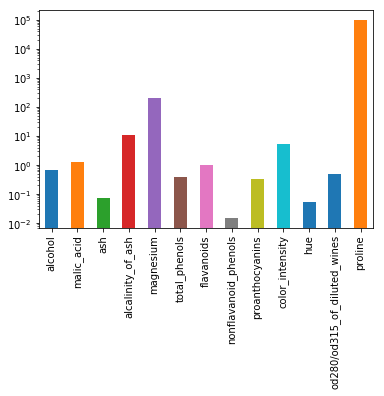

In [52]:
np.var(wines_df).plot(kind = 'bar', logy = True)

**compare the scatter of od280 vs malic_acid**

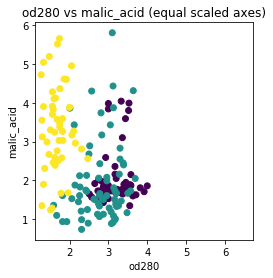

In [53]:
plt.scatter(
    x = wines_df['od280/od315_of_diluted_wines'], 
    y = wines_df['malic_acid'],
    c = data.target, 
)
plt.xlabel('od280')
plt.ylabel('malic_acid')
plt.axis('square')
plt.title('od280 vs malic_acid (equal scaled axes)')
plt.show()

**compared to the scatter of od280 vs proline**

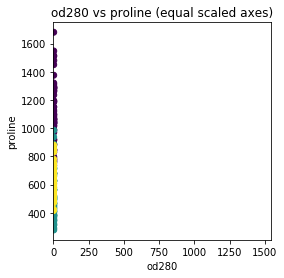

In [54]:
plt.scatter(
    x = wines_df['od280/od315_of_diluted_wines'], 
    y = wines_df['proline'],
    c = data.target, 
)
plt.xlabel('od280')
plt.ylabel('proline')
plt.axis('square')
plt.title('od280 vs proline (equal scaled axes)')
plt.show()

## StandardScaler
- in kmeans: feature variance is proportional to feature influence
    - *which makes sense when you think about it the centroids along the highest variance axis end up proportionately very far from other clusters*
    
- data needs to be transformed so the features have equal variance to eliminate the bias introduced by this scaling issue

- **StandardScaler** transforms each feature to have mean 0 and variance 1

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

# fit scaler to the saples
samples = data.data
scaler.fit(samples)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
samples_scaled = scaler.transform(samples)
samples_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Similar methods
- **StandardScaler** and **KMeans** have similar "methods"
- Use **fit()** / **transform()** with **StandardScaler**
- Use **fit()** / **predict()** with **KMeans**

## StandardScaler, then KMeans
- conveniently:
- Use sklearn pipeline to combine multiple steps
- to do this in the proper order and automatically



In [58]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

scaler = StandardScaler()

kmeans = KMeans(n_clusters = 3)

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(scaler, kmeans)

In [59]:
pipeline.fit(samples)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [60]:
labels = pipeline.predict(samples)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [61]:
df = pd.DataFrame({'labels': labels, 'varieties': data.target})
df.head()

,labels,varieties
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [62]:
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,0,1,2
labels,,,
0,0,65,0
1,59,3,0
2,0,3,48


## Now we can see our labels correspond much more closely to our varieties

# sklearn preprocessing steps
- **StandardScaler**
- **MaxAbsScaler** and **Normalizer** are other examples

## Practice:

In [63]:
samples = [[ 242. ,   23.2,   25.4,   30. ,   38.4,   13.4],
       [ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
       [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
       [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
       [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
       [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
       [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
       [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
       [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
       [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
       [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
       [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
       [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
       [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
       [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
       [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
       [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
       [ 610. ,   30.9,   33.5,   38.6,   40.5,   13.3],
       [ 650. ,   31. ,   33.5,   38.7,   37.4,   14.8],
       [ 575. ,   31.3,   34. ,   39.5,   38.3,   14.1],
       [ 685. ,   31.4,   34. ,   39.2,   40.8,   13.7],
       [ 620. ,   31.5,   34.5,   39.7,   39.1,   13.3],
       [ 680. ,   31.8,   35. ,   40.6,   38.1,   15.1],
       [ 700. ,   31.9,   35. ,   40.5,   40.1,   13.8],
       [ 725. ,   31.8,   35. ,   40.9,   40. ,   14.8],
       [ 720. ,   32. ,   35. ,   40.6,   40.3,   15. ],
       [ 714. ,   32.7,   36. ,   41.5,   39.8,   14.1],
       [ 850. ,   32.8,   36. ,   41.6,   40.6,   14.9],
       [1000. ,   33.5,   37. ,   42.6,   44.5,   15.5],
       [ 920. ,   35. ,   38.5,   44.1,   40.9,   14.3],
       [ 955. ,   35. ,   38.5,   44. ,   41.1,   14.3],
       [ 925. ,   36.2,   39.5,   45.3,   41.4,   14.9],
       [ 975. ,   37.4,   41. ,   45.9,   40.6,   14.7],
       [ 950. ,   38. ,   41. ,   46.5,   37.9,   13.7],
       [  40. ,   12.9,   14.1,   16.2,   25.6,   14. ],
       [  69. ,   16.5,   18.2,   20.3,   26.1,   13.9],
       [  78. ,   17.5,   18.8,   21.2,   26.3,   13.7],
       [  87. ,   18.2,   19.8,   22.2,   25.3,   14.3],
       [ 120. ,   18.6,   20. ,   22.2,   28. ,   16.1],
       [   0. ,   19. ,   20.5,   22.8,   28.4,   14.7],
       [ 110. ,   19.1,   20.8,   23.1,   26.7,   14.7],
       [ 120. ,   19.4,   21. ,   23.7,   25.8,   13.9],
       [ 150. ,   20.4,   22. ,   24.7,   23.5,   15.2],
       [ 145. ,   20.5,   22. ,   24.3,   27.3,   14.6],
       [ 160. ,   20.5,   22.5,   25.3,   27.8,   15.1],
       [ 140. ,   21. ,   22.5,   25. ,   26.2,   13.3],
       [ 160. ,   21.1,   22.5,   25. ,   25.6,   15.2],
       [ 169. ,   22. ,   24. ,   27.2,   27.7,   14.1],
       [ 161. ,   22. ,   23.4,   26.7,   25.9,   13.6],
       [ 200. ,   22.1,   23.5,   26.8,   27.6,   15.4],
       [ 180. ,   23.6,   25.2,   27.9,   25.4,   14. ],
       [ 290. ,   24. ,   26. ,   29.2,   30.4,   15.4],
       [ 272. ,   25. ,   27. ,   30.6,   28. ,   15.6],
       [ 390. ,   29.5,   31.7,   35. ,   27.1,   15.3],
       [   6.7,    9.3,    9.8,   10.8,   16.1,    9.7],
       [   7.5,   10. ,   10.5,   11.6,   17. ,   10. ],
       [   7. ,   10.1,   10.6,   11.6,   14.9,    9.9],
       [   9.7,   10.4,   11. ,   12. ,   18.3,   11.5],
       [   9.8,   10.7,   11.2,   12.4,   16.8,   10.3],
       [   8.7,   10.8,   11.3,   12.6,   15.7,   10.2],
       [  10. ,   11.3,   11.8,   13.1,   16.9,    9.8],
       [   9.9,   11.3,   11.8,   13.1,   16.9,    8.9],
       [   9.8,   11.4,   12. ,   13.2,   16.7,    8.7],
       [  12.2,   11.5,   12.2,   13.4,   15.6,   10.4],
       [  13.4,   11.7,   12.4,   13.5,   18. ,    9.4],
       [  12.2,   12.1,   13. ,   13.8,   16.5,    9.1],
       [  19.7,   13.2,   14.3,   15.2,   18.9,   13.6],
       [  19.9,   13.8,   15. ,   16.2,   18.1,   11.6],
       [ 200. ,   30. ,   32.3,   34.8,   16. ,    9.7],
       [ 300. ,   31.7,   34. ,   37.8,   15.1,   11. ],
       [ 300. ,   32.7,   35. ,   38.8,   15.3,   11.3],
       [ 300. ,   34.8,   37.3,   39.8,   15.8,   10.1],
       [ 430. ,   35.5,   38. ,   40.5,   18. ,   11.3],
       [ 345. ,   36. ,   38.5,   41. ,   15.6,    9.7],
       [ 456. ,   40. ,   42.5,   45.5,   16. ,    9.5],
       [ 510. ,   40. ,   42.5,   45.5,   15. ,    9.8],
       [ 540. ,   40.1,   43. ,   45.8,   17. ,   11.2],
       [ 500. ,   42. ,   45. ,   48. ,   14.5,   10.2],
       [ 567. ,   43.2,   46. ,   48.7,   16. ,   10. ],
       [ 770. ,   44.8,   48. ,   51.2,   15. ,   10.5],
       [ 950. ,   48.3,   51.7,   55.1,   16.2,   11.2],
       [1250. ,   52. ,   56. ,   59.7,   17.9,   11.7],
       [1600. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1550. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1650. ,   59. ,   63.4,   68. ,   15.9,   11. ]]
samples = np.array(samples)
species = ['Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike']

In [64]:
len(samples[0])

6

In [65]:
# for each feature/column
for i in range(6):
    # print variance of feature/column i 
    print('variance of feature', i, ': ', np.var(samples[:,i]))

variance of feature 0 :  143403.49889273357
variance of feature 1 :  125.95225743944637
variance of feature 2 :  146.72855916955018
variance of feature 3 :  172.1194823529412
variance of feature 4 :  105.8937993079585
variance of feature 5 :  4.430953633217994


## Scaling fish data for clustering
You are given an array `samples` giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education.](http://jse.amstat.org/jse_data_archive.htm)

In [66]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


### Clustering the fish data
You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

In [67]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,33,0,1,0
1,0,0,0,13
2,0,17,0,0
3,1,0,19,1


## Excercise
## Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements 
- (i.e. the dollar difference between the closing and opening prices for each trading day). 
- You are given a NumPy array `movements` of daily price movements 
    - from 2010 to 2015 (obtained from Yahoo! Finance), 
    - where each row corresponds to a company, 
    - and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a `Normalizer` at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`
- which you used in the previous exercise. 
- While `StandardScaler()` standardizes features (such as the features of the fish data from the previous exercise) 
    - by removing the mean and scaling to unit variance
- `Normalizer()` rescales each sample - here, each company's stock price - independently of the other.

🤔 *It seems that "sample" means "record"/"row."*
- which makes sense when we take a look at how this data is structured.

In [68]:
# read the data from my local copy
stock_movements_df = pd.read_json('data/stock-movements.json', orient = 'split')
stock_movements_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Apple to Yahoo
Columns: 963 entries, 2010-01-04 to 2013-10-29
dtypes: float64(963)
memory usage: 451.9+ KB


In [69]:
stock_movements_df.head(2)

,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,2010-01-14 00:00:00,2010-01-15 00:00:00,...,2013-10-16 00:00:00,2013-10-17 00:00:00,2013-10-18 00:00:00,2013-10-21 00:00:00,2013-10-22 00:00:00,2013-10-23 00:00:00,2013-10-24 00:00:00,2013-10-25 00:00:00,2013-10-28 00:00:00,2013-10-29 00:00:00
Apple,0.580000,-0.220005,-3.409998,-1.17,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.42,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000


*Well... perhaps "record" or "sample" is an infelicitous term for this data. I am more tempted to call each row an "entity" and each column a "measurement" of that entitie's same attribute; it's stock movement. But I guess it's understandable why we would call each row a "sample" and each column a "feature" since all the "samples" have the same "features."*

In [70]:
movements = stock_movements_df.values

In [71]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

## Which stocks move together?
We just clustered companies by their daily stock price movements. 
- So which companies have stock prices that tend to change in the same way?
- Let's inspect the cluster labels

In [72]:
labels = pipeline.predict(movements)
labels

array([4, 2, 4, 0, 6, 2, 7, 5, 9, 8, 7, 3, 7, 9, 3, 5, 2, 4, 2, 7, 0, 5,
       5, 4, 3, 8, 2, 8, 1, 6, 0, 1, 9, 3, 5, 9, 6, 7, 1, 7, 8, 1, 7, 4,
       7, 5, 7, 4, 5, 7, 4, 4, 7, 9, 8, 2, 8, 7, 5, 9], dtype=int32)

- *🤔 I guess the wisdom is that if we had normalized by column, then the clustering would just find which stocks spent the most time in the same price percentiles.*
    - *i.e. some stocks spent most of their time in the top 10% most expensive.*
- *But by scaling each row we find which stocks grew and shrank proportionately the same*

**transpose the data for easy time series plotting**

In [73]:
stock_movements_df.head(2).transpose().head()

,Apple,AIG
2010-01-04,0.580000,-0.640002
2010-01-05,-0.220005,-0.650000
2010-01-06,-3.409998,-0.210001
2010-01-07,-1.170000,-0.420000
2010-01-08,1.680011,0.710001


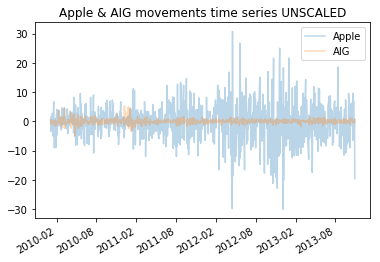

In [74]:
stock_movements_df.head(2).transpose().plot(alpha = .3, 
                                            #figsize = (20, 10)
                                           )
plt.title('Apple & AIG movements time series UNSCALED')
plt.show()

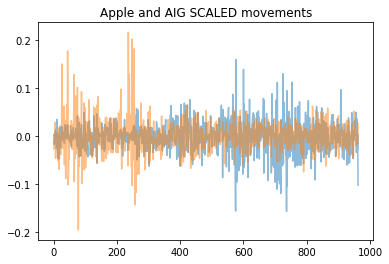

In [75]:
plt.plot(normalizer.transform(movements)[0], alpha = .5)
plt.plot(normalizer.transform(movements)[1], alpha = .5)
plt.title('Apple and AIG SCALED movements')
plt.show()

In [76]:
companies = [c for c in stock_movements_df.index]

## Scaling and Normalization Compared and Contrasted

In [77]:
stock_movements_df.head(1).transpose().head()

,Apple
2010-01-04,0.580000
2010-01-05,-0.220005
2010-01-06,-3.409998
2010-01-07,-1.170000
2010-01-08,1.680011


**Histogram un un-altered Apple Movements**

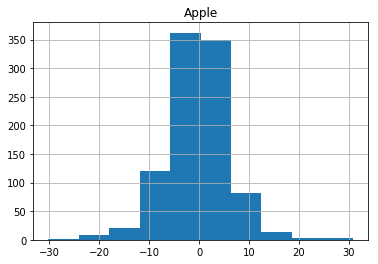

In [78]:
stock_movements_df.head(1).transpose().hist()
plt.show()

In [79]:
print('mean', np.mean(stock_movements_df.head(1).transpose()).values)
print('variance', np.var(stock_movements_df.head(1).transpose()).values)
print('std', np.std(stock_movements_df.head(1).transpose()).values)

mean [-0.34124641]
variance [38.17210095]
std [6.17835746]


(recall that standard deviation (std) is the square root of variance and that variance is the average of the squares of the differences from the mean.)

**Scaled Apple Movements**

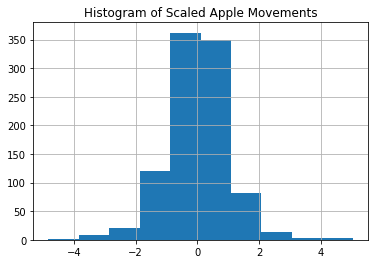

In [80]:
plt.hist(scaler.fit_transform(stock_movements_df.head(1).transpose()))
plt.title('Histogram of Scaled Apple Movements')
plt.grid()
plt.show()

In [81]:
print('mean', np.mean(scaler.fit_transform(stock_movements_df.head(1).transpose())))
print('variance', np.var(scaler.fit_transform(stock_movements_df.head(1).transpose())))
print('std', np.std(scaler.fit_transform(stock_movements_df.head(1).transpose())))

mean -3.6892146197305305e-18
variance 1.0
std 1.0


**Normalized Apple movements**

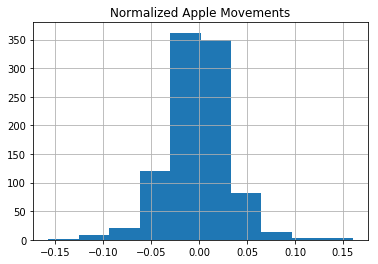

In [82]:
plt.hist(normalizer.fit_transform(stock_movements_df.head(1))[0])
plt.grid()
plt.title('Normalized Apple Movements')
plt.show()

In [83]:
print('mean', np.mean(normalizer.fit_transform(stock_movements_df.head(1))))
print('var', np.var(normalizer.fit_transform(stock_movements_df.head(1))))
print('std', np.std(normalizer.fit_transform(stock_movements_df.head(1))))

mean -0.001777135259591411
var 0.0010352633894383794
std 0.03217550915585299


**Notice that the Scaled distribution has a mean of about 0 and a variance of 1**

**the Normalized distribution also has a mean of about 0 but a variance that seems to have been "scaled" or "reduced" in proportion to the changes to the mean**

🤔 Not sure exactly what calculations they are doing in the background... I'll think about this a bit more. 🔵 

## back to datacamp's excercise

In [84]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
3        0                    American express
30       0                          MasterCard
20       0                          Home Depot
31       1                           McDonalds
28       1                           Coca Cola
38       1                               Pepsi
41       1                       Philip Morris
16       2                   General Electrics
1        2                                 AIG
55       2                         Wells Fargo
5        2                     Bank of America
26       2                      JPMorgan Chase
18       2                       Goldman Sachs
24       3                               Intel
33       3                           Microsoft
14       3                                Dell
11       3                               Cisco
47       4                            Symantec
2        4                              Amazon
51       4                   Texas instruments
50       4  T

# Chapter 2
---
## Visualizing Hierarchies
### Visualisations communicate insight
- "t-SNE": Creates a 2D map of a dataset (later)
- "Hierarchical clustering"

### A hierarchy of groups
- Groups of living things can form a hierarchy
- Clusters are contained in one another

Animals
- mammals
    - humans
    - apes
- reptiles
    - snakes
    - lizards

**we can "hierarchisize" any dataset**

### Eurovision scoring dataset
- countries gave scores to songs performed at the eurovision 2016
- 2d array of scores
- rows are countires, columns are songs

In [85]:
pd.DataFrame({'index': ['Albania', 'Armenia', 'UK'],
             'song0': [8, 9, 7],
             'songN': [6, 9, 9]})

,index,song0,songN
0,Albania,8,6
1,Armenia,9,9
2,UK,7,9


## This data can be visulized as a dendrogram

![Eurovision 2016 voting dedrogram](images/eurovision-2016-dendrogram.png)

- the dendrogram confirms some of our intuitions about similarities between countries

## Hierarchical clustering
- every country begins in a separate cluster
- at each step, the two closest clusters are merged
- continue until all countires in a single cluster
- this is "agglomerative" hierarchical clustering


- read "bottom up"
- first merges appear lower on the y-axis

## Hierarchical clustering with SciPy
- Given **samples** (array of scores) and **country_names**

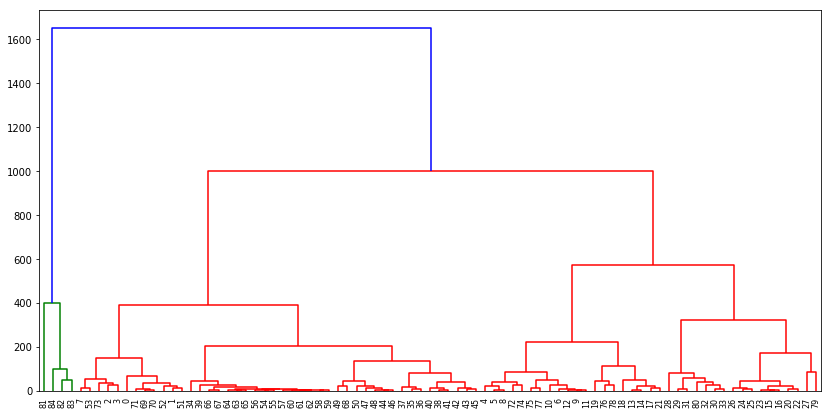

In [86]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# we'll recycle the data from the stock movements
mergings = linkage(samples, method = 'complete')

plt.figure(figsize = (14, 7))

dendrogram(mergings,
          leaf_rotation = 90,
          leaf_font_size = 8)


plt.show()

**Note: there are n-1 merges for n samples**

## Excercise
## Hierarchical clustering of the grain data
- Use SciPy's `linkage()` to obtain hierarchical clustering of the grain samples.
- Visualize it with `dendrogram()`


In [87]:
seed_samples = [[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]]
seed_varieties = ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

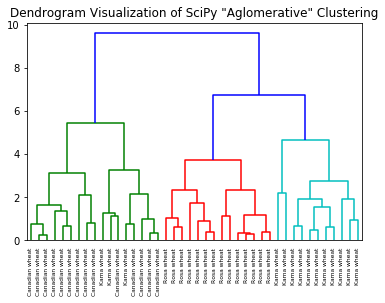

In [88]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(seed_samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=seed_varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.title('Dendrogram Visualization of SciPy "Aglomerative" Clustering')
plt.show()


## Hierarchies of stocks
Recall the stock data from above. 
SciPy's hierarchical clustering, `linkage` doesn't fit into an sklearn pipeline so we'll `normalize()` it first using `sklearn.preprocessing`

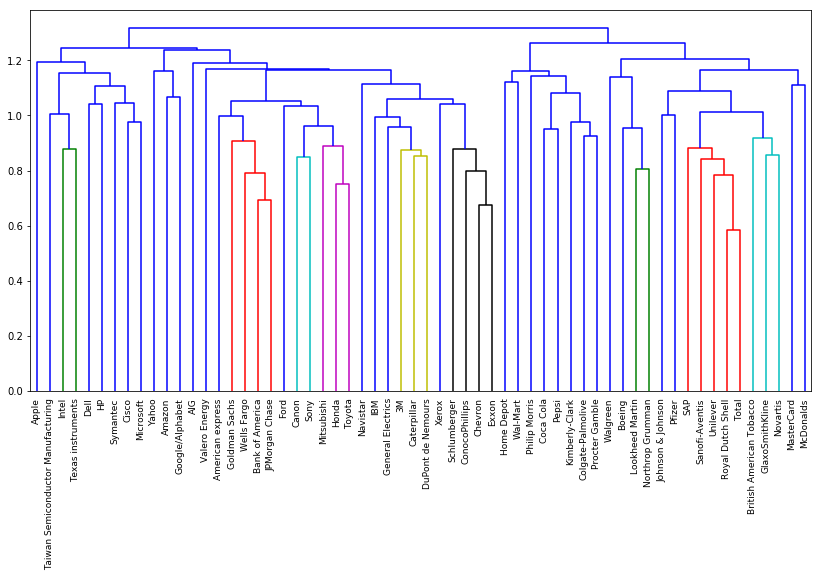

In [89]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'complete')

# Plot the dendrogram
plt.figure(figsize=(14, 7))
dendrogram(mergings,
    labels = companies,
    leaf_rotation = 90,
    leaf_font_size = 9)
plt.show()


## Cluster labels in hierarchical clustering
- not only a vis tool
- cluster labels at any intermediate stage can be recovered
- for use in e.g. cross-tabulations

- specified by choosing a height on the dendrogram
- y-axis encodes distance between merging clusters

## intermediate clusterings & height on dendrogram
- Height on dendrogram specifies ma. distance between merging clusters
- can specify clustering limitations
    - Don't merge clusters further apart than this (e.g. 15)
    
## Distance between clusters
- defined by a "linkage method"
- Specified via method parameter in `linkage(samples, method = "complete")`

- in "complete" distance between clusters is the maxximum distance between their samples
- Different linkage method, different hierarchical clustering!

## Extracting cluster labels
Can be extracted at any intermediate stage of the clustering
- use the `fcluster` method
- returns a NumPy array of cluster labels

## Measures of difference between clusters
![clustering-distance](images/clustering-distance.png)

## Excercise
### Different Linkage, different hierarchical clustering!
Compare the resulting clustering from using different linking methods

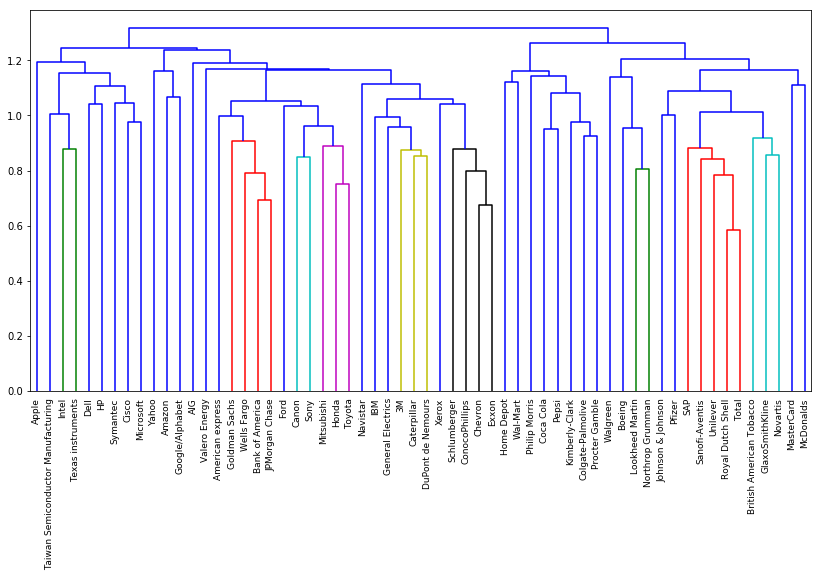

In [90]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'complete')

# Plot the dendrogram
plt.figure(figsize=(14, 7))
dendrogram(mergings,labels = companies,leaf_rotation = 90,leaf_font_size = 9)
plt.show()

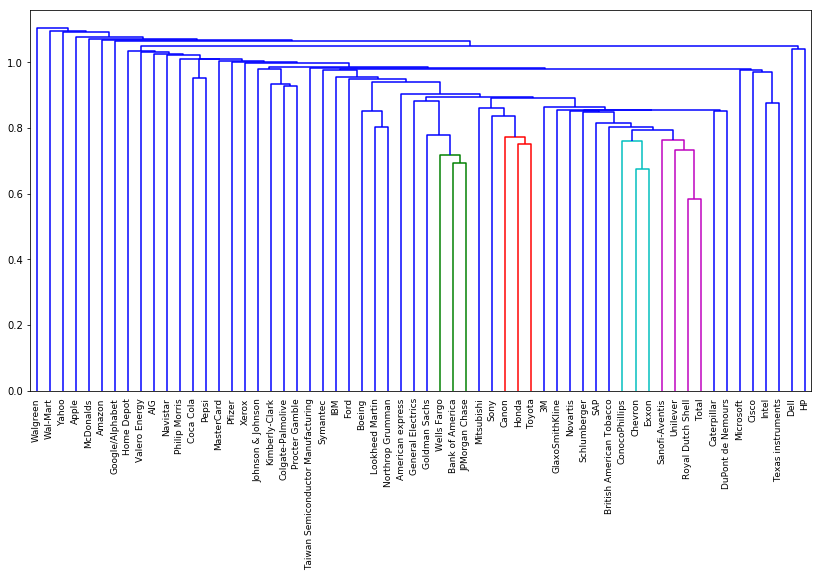

In [91]:
mergings = linkage(normalized_movements, method = 'single')
# Plot the dendrogram
plt.figure(figsize=(14, 7))
dendrogram(mergings, labels = companies, leaf_rotation = 90, leaf_font_size = 9)
plt.show()

## Extracting the cluster labels
Recall the seed dendrogram. 

**Note that if we restricted clustering to height 6 we would end up with only 3 clusters**

In [92]:
seed_samples[:5]

[[14.88, 14.57, 0.8811, 5.554, 3.333, 1.018, 4.956],
 [14.69, 14.49, 0.8799, 5.563, 3.259, 3.586, 5.219],
 [14.03, 14.16, 0.8796, 5.438, 3.201, 1.717, 5.001],
 [13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781],
 [14.11, 14.26, 0.8722, 5.52, 3.168, 2.688, 5.219]]

In [93]:
seed_varieties[:5]

['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat']

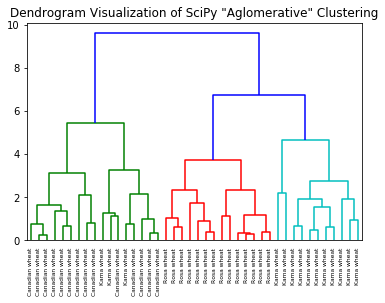

In [94]:
# Calculate the linkage: mergings
mergings = linkage(seed_samples, method='complete')
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,labels=seed_varieties,leaf_rotation=90,leaf_font_size=6)
plt.title('Dendrogram Visualization of SciPy "Aglomerative" Clustering')
plt.show()

Let's use `fcluster()` to extract the cluster labels for this intermediate clutering. And we'll compare the labels with the grain varieties using cross-tabulation.

In [95]:
from scipy.cluster.hierarchy import fcluster

# flat hierarchical clustering with threshold = t
# Use fcluster to extract labels: labels
labels = fcluster(mergings, t = 6, criterion= 'distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': seed_varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0


In [96]:
df

,labels,varieties
0,3,Kama wheat
1,3,Kama wheat
2,3,Kama wheat
3,3,Kama wheat
4,3,Kama wheat
5,1,Kama wheat
6,3,Kama wheat
7,3,Kama wheat
8,1,Kama wheat
9,3,Kama wheat


## t-SNE for 2-dimensional maps
- t-SNE = "t-distributed stochastic neighbor embedding"
- Maps samples from higher dimensional space to 2d or 3d space
- Map approximately preserves "nearness" of samples
- Great for inspecting datasets

## t-SNE on iris
- iris has 4 measurements, so samples are 4-dimensional
- t-SNE samples to 2D space
- t-SNE didn't know that there were different species 
- ... yet kept the species mostly separate

## t-SNE in sklearn

In [97]:
from sklearn import datasets
iris = datasets.load_iris()
iris_samples = iris.data
print(iris_samples[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [98]:
iris_species = iris.target
iris_species[:5]

array([0, 0, 0, 0, 0])

**import t-SNE from sklearn**

transformed samples
 [[-24.77704   -9.341734]
 [-22.354366 -10.305236]
 [-21.974745  -9.162343]
 [-21.737875  -9.439185]
 [-24.840899  -8.86017 ]]


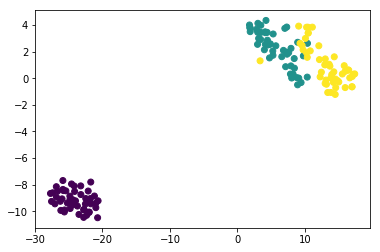

In [99]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)
# 🔵 I wonder what the learning rate is about
# I'd also like to learn more about how tsne works
transformed_iris = model.fit_transform(iris_samples)
print('transformed samples' + '\n', transformed_iris[:5])
xs = transformed_iris[:,0]
ys = transformed_iris[:,1]
plt.scatter(xs, ys, c = iris_species)
plt.show()

*Interesting to see the numerical values of the transformation into 2d space*

transformed samples
 [[ 1.6250122 24.713202 ]
 [ 2.2005925 22.179586 ]
 [ 1.0397484 21.865866 ]
 [ 1.2952381 21.61223  ]
 [ 1.9518746 24.838392 ]]


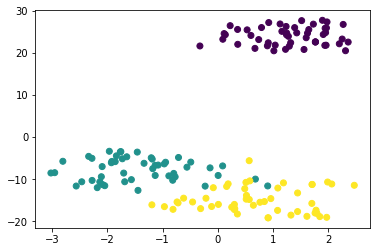

In [100]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)
# 🔵 I wonder what the learning rate is about
# I'd also like to learn more about how tsne works
transformed_iris = model.fit_transform(iris_samples)
print('transformed samples' + '\n', transformed_iris[:5])
xs = transformed_iris[:,0]
ys = transformed_iris[:,1]
plt.scatter(xs, ys, c = iris_species)
plt.show()

### 🔵 🤔 *Note that the tSNE visualization depends on a random state and is sometimes clearer than other times*

## t-SNE has only fit_transform()
- has a `fit_transform()` method
- but not separate `fit()` and `transform()` methods
#### t-SNE map can't be extended to include new data samples
- **must be started over each time**

## t-SNE learning rate
- might need to try different rates for different data sets
- wrong choice is clear because different samples will all be bunched together
- **rule of thumb: try rates between 50 and 200**

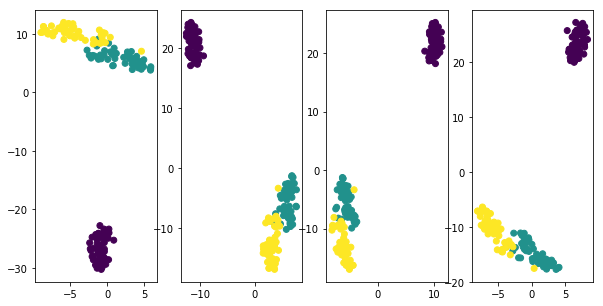

In [101]:
fig, ax = plt.subplots(1, 4, figsize = (10, 5))
learning_rates = [50, 100, 150, 200]
for i in range(4):
    model = TSNE(learning_rate = learning_rates[i], random_state=123)
    transformed_iris = model.fit_transform(iris_samples)
    xs = transformed_iris[:,0]
    ys = transformed_iris[:,1]
    ax[i].scatter(xs, ys, c = iris_species)

plt.show()

## Different every time
- axes of t-SNE plot have no interpretable meaning
- features are different every time
    - even on the same data with the same code

## Excercise: t-SNE on Grain (aka seeds)

In [102]:
seeds_df.head(3)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,lenght_of_kernel_groove,unknown
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


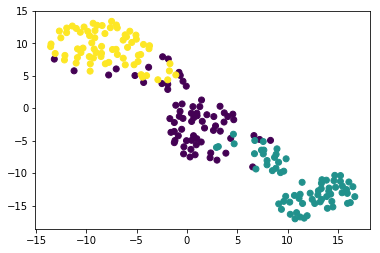

Recall the n-dimensional data was reduced to 2d
transformed samples
 [[ 1.4219873  -5.190229  ]
 [-1.2499795  -5.2947445 ]
 [ 0.6871417  -1.4342568 ]
 [-0.67906904 -0.46254322]
 [ 0.8181624  -7.1642885 ]]


In [103]:
# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(seeds_df.drop('unknown', axis = 'columns').values)

# Select the 0th feature: xs
xs = tsne_features[:,0]
# Select the 1st feature: ys
ys = tsne_features[:,1]
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c = seeds_df.unknown)
plt.show()
print('Recall the n-dimensional data was reduced to 2d')
print('transformed samples' + '\n', tsne_features[:5])

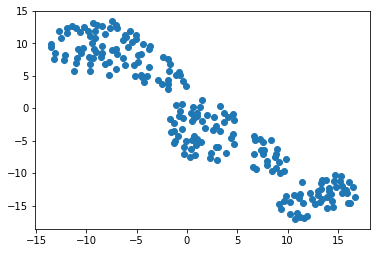

In [104]:
plt.scatter(xs, ys)
plt.show()

*🤔 it's curious that t-SNE suggests 4 clusters instead of the three anticipated by our labels*

## Excercise t-SNE map of stock market
- t-SNE is also great when individual samples can be labeled

recall from above the stock market data

In [105]:
stock_movements_df.head(2)

,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,2010-01-14 00:00:00,2010-01-15 00:00:00,...,2013-10-16 00:00:00,2013-10-17 00:00:00,2013-10-18 00:00:00,2013-10-21 00:00:00,2013-10-22 00:00:00,2013-10-23 00:00:00,2013-10-24 00:00:00,2013-10-25 00:00:00,2013-10-28 00:00:00,2013-10-29 00:00:00
Apple,0.580000,-0.220005,-3.409998,-1.17,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.42,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000


In [106]:
movements[0][:5]

array([ 0.58    , -0.220005, -3.409998, -1.17    ,  1.680011])

In [107]:
normalizer.transform(movements)[0][:5]

array([ 0.00302051, -0.00114574, -0.01775851, -0.0060931 ,  0.00874912])

In [108]:
movements_normalized = normalizer.transform(movements)

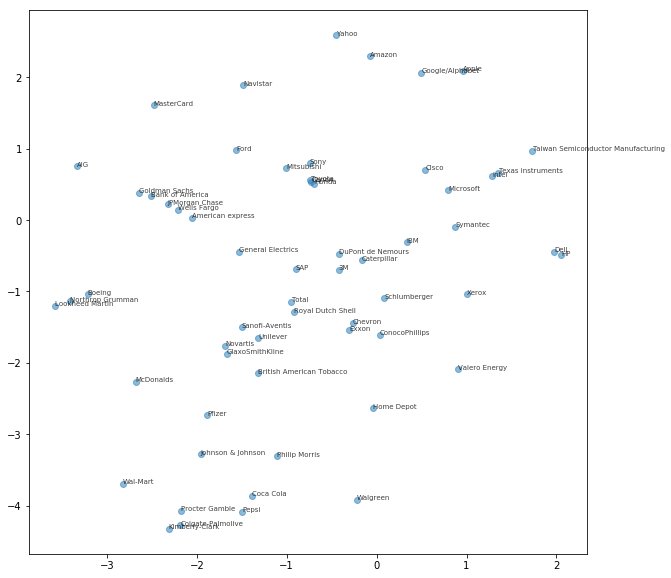

Recall the n-dimensional data was reduced to 2d
transformed samples
 [[ 0.96296704  2.0899637 ]
 [-3.3358533   0.7552351 ]
 [-0.07325947  2.2901106 ]
 [-2.0500968   0.02854907]
 [-3.2137694  -1.0421628 ]]


In [109]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(movements_normalized)

# Select the 0th feature: xs (aka the first column)
xs = tsne_features[:,0]

# Select the 1th feature: ys (aka the second column)
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(xs, ys, alpha = 0.5)
#plt.show()

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=7, alpha=0.75)
plt.show()
print('Recall the n-dimensional data was reduced to 2d')
print('transformed samples' + '\n', tsne_features[:5])

---
# Chapter 3
**Visualizing the PCA transformation**
## Dimension reduction
- finds patterns in data
- uses these patters to "re-express" the data in a "compressed" form
- makes calculations and storage more efficient.
- **Most important function is to remove "less-informative" "noise" feautres**
- which cause problems for prediction tasks (e.g. classification, regression)

## Principal Component Analysis
- PCA
- Fundamental dimension reduction technique
- First step "decorrelation" (considered here)
- Second step reduces dimension (considered later)

## PCA aligns data with axes
- Rotates data samples to be aligned with axes
- Shifts the data samples so they have mean 0
![pca-decorrelated-wine-samples](images/wine-samples-pca-decorrelation.png)

## PCA follows fit/transform patter
- **PCA** a scikit-learn component like **Kmeans** or **StandardScaler**
- `fit()` learns the transformation from given data
- `transfrom()` applies the leaned transformation
- `transform()` can be applied to new unseen samples

In [110]:
from sklearn.datasets import load_wine
data = load_wine()
samples = data['data']

data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [111]:
wines_df = pd.DataFrame(data.data, columns = data.feature_names)
wines_df['target'] = data['target']
wines_df['target_names'] = [data['target_names'][p] for p in data['target']]
wines_df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [112]:
samples = wines_df[['total_phenols', 'od280/od315_of_diluted_wines']].values
print(samples[:5])

[[2.8  3.92]
 [2.65 3.4 ]
 [2.8  3.17]
 [3.85 3.45]
 [2.8  2.93]]


In [113]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(samples)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [114]:
transformed = model.transform(samples)

In [115]:
transformed[:5]

array([[-1.32771994,  0.45139607],
       [-0.83249607,  0.23309966],
       [-0.75216868, -0.02947892],
       [-1.64026613, -0.65572401],
       [-0.56799228, -0.18335891]])

Same number of rows and columns as the original feautres
## PCA features
- Rows of `transformed` correspond to samples
- Columns of `transformed` are the "PCA features"
- Row gives PCA feature values of corresponding sample

## PCA features are not correlated
- Features of datasets are often correlated, e.g. total_phenols and od280
- PCA  (due to the rotation) aligns the data with axes
- Resulting PCA features are not linearly correlated ("decorrelation")

![pca-decorrelated-wine-samples](images/wine-samples-pca-decorrelation.png)

**Pearson correlation**
- Measure of linear correlation of features
- values between -1 and 1
- Value of 0 means no linea correlation

## Principal components
- "principal components" = directions of variance 
    - directions in which the samples vary the most
- PCA aligns princpal components with the axes
![principal-component-vectors](images/principal-component-vectors.png)

- Available as `components_` attribute of PCA object
- Each row defines displacement from mean

In [116]:
model.components_

array([[-0.64116665, -0.76740167],
       [-0.76740167,  0.64116665]])

In [117]:
grains = np.array([[3.312, 5.763],
       [3.333, 5.554],
       [3.337, 5.291],
       [3.379, 5.324],
       [3.562, 5.658],
       [3.312, 5.386],
       [3.259, 5.563],
       [3.302, 5.42 ],
       [3.465, 6.053],
       [3.505, 5.884],
       [3.242, 5.714],
       [3.201, 5.438],
       [3.199, 5.439],
       [3.156, 5.479],
       [3.114, 5.482],
       [3.333, 5.351],
       [3.383, 5.119],
       [3.514, 5.527],
       [3.466, 5.205],
       [3.049, 5.226],
       [3.129, 5.658],
       [3.168, 5.52 ],
       [3.507, 5.618],
       [2.936, 5.099],
       [3.245, 5.789],
       [3.421, 5.833],
       [3.026, 5.395],
       [2.956, 5.395],
       [3.221, 5.541],
       [3.065, 5.516],
       [2.975, 5.454],
       [3.371, 5.757],
       [3.186, 5.717],
       [3.15 , 5.585],
       [3.328, 5.712],
       [3.485, 5.709],
       [3.464, 5.826],
       [3.683, 5.832],
       [3.288, 5.656],
       [3.298, 5.397],
       [3.156, 5.348],
       [3.158, 5.351],
       [3.201, 5.138],
       [3.396, 5.877],
       [3.462, 5.579],
       [3.155, 5.376],
       [3.393, 5.701],
       [3.377, 5.57 ],
       [3.291, 5.545],
       [3.258, 5.678],
       [3.272, 5.585],
       [3.434, 5.674],
       [3.113, 5.715],
       [3.199, 5.504],
       [3.113, 5.741],
       [3.212, 5.702],
       [3.377, 5.388],
       [3.412, 5.384],
       [3.419, 5.662],
       [3.032, 5.159],
       [2.85 , 5.008],
       [2.879, 4.902],
       [3.042, 5.076],
       [3.07 , 5.395],
       [3.026, 5.262],
       [3.119, 5.139],
       [3.19 , 5.63 ],
       [3.158, 5.609],
       [3.153, 5.569],
       [2.882, 5.412],
       [3.561, 6.191],
       [3.484, 5.998],
       [3.594, 5.978],
       [3.93 , 6.154],
       [3.486, 6.017],
       [3.438, 5.927],
       [3.403, 6.064],
       [3.814, 6.579],
       [3.639, 6.445],
       [3.566, 5.85 ],
       [3.467, 5.875],
       [3.857, 6.006],
       [3.864, 6.285],
       [3.772, 6.384],
       [3.801, 6.366],
       [3.651, 6.173],
       [3.764, 6.084],
       [3.67 , 6.549],
       [4.033, 6.573],
       [4.032, 6.45 ],
       [3.785, 6.581],
       [3.796, 6.172],
       [3.693, 6.272],
       [3.86 , 6.037],
       [3.485, 6.666],
       [3.463, 6.139],
       [3.81 , 6.341],
       [3.552, 6.449],
       [3.512, 6.271],
       [3.684, 6.219],
       [3.525, 5.718],
       [3.694, 5.89 ],
       [3.892, 6.113],
       [3.681, 6.369],
       [3.755, 6.248],
       [3.786, 6.037],
       [3.806, 6.152],
       [3.573, 6.033],
       [3.763, 6.675],
       [3.674, 6.153],
       [3.769, 6.107],
       [3.791, 6.303],
       [3.902, 6.183],
       [3.737, 6.259],
       [3.991, 6.563],
       [3.719, 6.416],
       [3.897, 6.051],
       [3.815, 6.245],
       [3.769, 6.227],
       [3.857, 6.493],
       [3.962, 6.315],
       [3.563, 6.059],
       [3.387, 5.762],
       [3.771, 5.98 ],
       [3.582, 5.363],
       [3.869, 6.111],
       [3.594, 6.285],
       [3.687, 5.979],
       [3.773, 6.513],
       [3.69 , 5.791],
       [3.755, 5.979],
       [3.825, 6.144],
       [3.268, 5.884],
       [3.395, 5.845],
       [3.408, 5.776],
       [3.465, 5.477],
       [3.574, 6.145],
       [3.231, 5.92 ],
       [3.286, 5.832],
       [3.472, 5.872],
       [2.994, 5.472],
       [3.073, 5.541],
       [3.074, 5.389],
       [2.967, 5.224],
       [2.777, 5.314],
       [2.687, 5.279],
       [2.719, 5.176],
       [2.967, 5.267],
       [2.911, 5.386],
       [2.648, 5.317],
       [2.84 , 5.263],
       [2.776, 5.405],
       [2.833, 5.408],
       [2.693, 5.22 ],
       [2.755, 5.175],
       [2.675, 5.25 ],
       [2.849, 5.053],
       [2.745, 5.394],
       [2.678, 5.444],
       [2.695, 5.304],
       [2.879, 5.451],
       [2.81 , 5.35 ],
       [2.847, 5.267],
       [2.968, 5.333],
       [2.794, 5.011],
       [2.941, 5.105],
       [2.897, 5.319],
       [2.837, 5.417],
       [2.668, 5.176],
       [2.715, 5.09 ],
       [2.701, 5.325],
       [2.845, 5.167],
       [2.763, 5.088],
       [2.763, 5.136],
       [2.641, 5.278],
       [2.821, 4.981],
       [2.71 , 5.186],
       [2.642, 5.145],
       [2.758, 5.18 ],
       [2.893, 5.357],
       [2.775, 5.09 ],
       [3.017, 5.236],
       [2.909, 5.24 ],
       [2.85 , 5.108],
       [3.026, 5.495],
       [2.683, 5.363],
       [2.716, 5.413],
       [2.675, 5.088],
       [2.821, 5.089],
       [2.787, 4.899],
       [2.717, 5.046],
       [2.804, 5.091],
       [2.953, 5.132],
       [2.63 , 5.18 ],
       [2.975, 5.236],
       [3.126, 5.16 ],
       [3.054, 5.224],
       [3.128, 5.32 ],
       [2.911, 5.41 ],
       [3.155, 5.073],
       [2.989, 5.219],
       [3.135, 4.984],
       [2.81 , 5.009],
       [3.091, 5.183],
       [2.96 , 5.204],
       [2.981, 5.137],
       [2.795, 5.14 ],
       [3.232, 5.236],
       [2.836, 5.175],
       [2.974, 5.243]])

Excercise

### Correlated data in nature
given an array `grains` of the width and lenght of grain samples, you suspect that width and length will be correlated. To confirm this, make a scatter plot of width v length and measure their Pearson correlation.

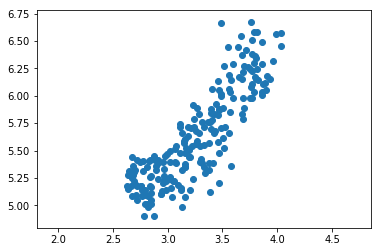

Pearson correlation 0.8604149377143467


In [118]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print('Pearson correlation', correlation)


### Decorrelating the grain measurements with PCA
- decorrelate with PCA
- plot
- examine new pearson correlation

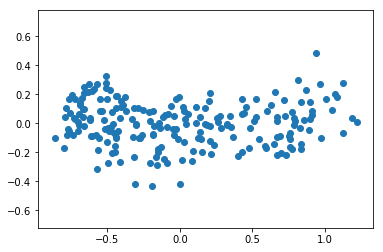

7.47465689945304e-17


In [119]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

**Intrinsic dimension**
## Intrinsic dimension of a flight path
- 2 features: longitued and latitude at points along a flight path
- Dataset *appears* to be 2-dimensional
- But, it can be approximated using only one feature; call it: **displacement along flight path**

We can say that it is intrinsically one dimensional.

![intrinsic-dimension-flight-path](images/intrinsic-dimension-flight-path.png)

### Intrinsic dimension
- the number of features needed to approximate the dataset
- informs dimension reduction because it tells us how much data set can be compressed (without too much loss of information)
- Essential idea behind dimension reduction
- What is the most compact representation of the samples?
- Can be detected with PCA

### Versicolor dataset
- "versicolor", one of the iris species
- Only 3 features: sepal lenght, sepal widht, and petal width
- samples are points in 3d space

In [120]:
versicolor_df = iris_seaborn[iris_seaborn.species == 'versicolor']
versicolor_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [121]:
import plotly.express as px

In [135]:
fig = px.scatter_3d(versicolor_df, y = 'sepal_length', x = 'sepal_width', z = 'petal_width')
fig.show()


### Versicolor dataset has instrinsic dimension 2
- Samples lie cose to a flat 2-dimensional sheet
- data can be approimated with two coords without loosing too much information

### PCA identifies intrinsic dimension
- identifies intrinsice dimension when samples have *any number* of features
- intrinsic dimension = number of PCA featues with significant variance

In [187]:
model = PCA()
pca_versicolor = model.fit_transform(
    X = versicolor_df.drop(columns=['species', 'petal_length'])
)
pca_versicolor[:3]

array([[-1.13236543,  0.09514055, -0.17654689],
       [-0.62150644, -0.20612416, -0.04140747],
       [-1.02792193,  0.10180149, -0.03853535]])

In [188]:
pca_versicolor_df = pd.DataFrame(pca_versicolor, columns=['sepal_length', 'sepal_width', 'petal_width'])
pca_versicolor_df.head(3)

,sepal_length,sepal_width,petal_width
0,-1.132365,0.095141,-0.176547
1,-0.621506,-0.206124,-0.041407
2,-1.027922,0.101801,-0.038535


In [189]:
fig = px.scatter_3d(
    pca_versicolor_df, 
    y = 'sepal_length', 
    x = 'sepal_width', 
    z = 'petal_width'
)
fig.show()


**It's a subte difference, but notice the axes have changed and the cluster is now centerd around the origin of the space**

In [190]:
features = range(model.n_components_)
features

range(0, 3)

In [191]:
model.explained_variance_

array([0.31838135, 0.06840638, 0.01722043])

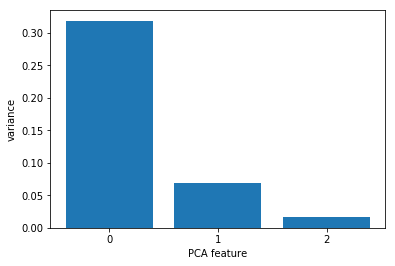

In [192]:
plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

### PCA features are ordered by variance descending
- the last one has very low variance

### Variance and intrinsic dimension
- the number of PCA features with "significant" variance
- in our example: the first two PCA features
- so, intrisic dimension is 2

🤔 *they haven't said yet how "significance" is being defined*

### Intrinsic dimension can be ambiguous
- intrinsic dimension is an idealization
- ... there is not alwasy one correct answer!
- piedmotn wines could argue for 2, or 3, or more

In [193]:
model = PCA()
model.fit(wines_df.drop(columns = ['target', 'target_names']).values)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

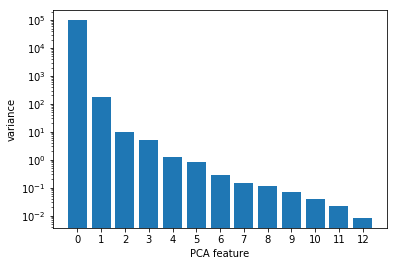

In [194]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_, log = True)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

**Excercise**
### the first principal component
the first principal component of the data is the direction inwhich the data varies the most.

- use PCA to find the first principal component of the length and width measuresments of the grain samples and represent them as arrows on a scatter plot

In [195]:
model = PCA()
model.fit(grains)
model.mean_

array([3.25860476, 5.62853333])

In [196]:
model.components_

array([[ 0.63910027,  0.76912343],
       [-0.76912343,  0.63910027]])

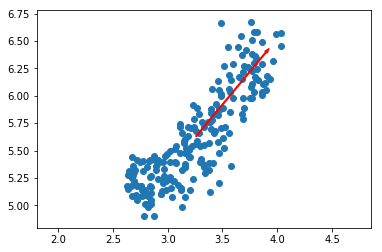

In [197]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### Variance of the PCA features
The fish dataset is 6-dimensional.
- find the PCA intrinsice dimensionality.
- plot the variances of the PCA features to find out.


In [212]:

samples = [[ 242. ,   23.2,   25.4,   30. ,   38.4,   13.4],
       [ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
       [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
       [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
       [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
       [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
       [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
       [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
       [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
       [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
       [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
       [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
       [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
       [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
       [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
       [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
       [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
       [ 610. ,   30.9,   33.5,   38.6,   40.5,   13.3],
       [ 650. ,   31. ,   33.5,   38.7,   37.4,   14.8],
       [ 575. ,   31.3,   34. ,   39.5,   38.3,   14.1],
       [ 685. ,   31.4,   34. ,   39.2,   40.8,   13.7],
       [ 620. ,   31.5,   34.5,   39.7,   39.1,   13.3],
       [ 680. ,   31.8,   35. ,   40.6,   38.1,   15.1],
       [ 700. ,   31.9,   35. ,   40.5,   40.1,   13.8],
       [ 725. ,   31.8,   35. ,   40.9,   40. ,   14.8],
       [ 720. ,   32. ,   35. ,   40.6,   40.3,   15. ],
       [ 714. ,   32.7,   36. ,   41.5,   39.8,   14.1],
       [ 850. ,   32.8,   36. ,   41.6,   40.6,   14.9],
       [1000. ,   33.5,   37. ,   42.6,   44.5,   15.5],
       [ 920. ,   35. ,   38.5,   44.1,   40.9,   14.3],
       [ 955. ,   35. ,   38.5,   44. ,   41.1,   14.3],
       [ 925. ,   36.2,   39.5,   45.3,   41.4,   14.9],
       [ 975. ,   37.4,   41. ,   45.9,   40.6,   14.7],
       [ 950. ,   38. ,   41. ,   46.5,   37.9,   13.7],
       [  40. ,   12.9,   14.1,   16.2,   25.6,   14. ],
       [  69. ,   16.5,   18.2,   20.3,   26.1,   13.9],
       [  78. ,   17.5,   18.8,   21.2,   26.3,   13.7],
       [  87. ,   18.2,   19.8,   22.2,   25.3,   14.3],
       [ 120. ,   18.6,   20. ,   22.2,   28. ,   16.1],
       [   0. ,   19. ,   20.5,   22.8,   28.4,   14.7],
       [ 110. ,   19.1,   20.8,   23.1,   26.7,   14.7],
       [ 120. ,   19.4,   21. ,   23.7,   25.8,   13.9],
       [ 150. ,   20.4,   22. ,   24.7,   23.5,   15.2],
       [ 145. ,   20.5,   22. ,   24.3,   27.3,   14.6],
       [ 160. ,   20.5,   22.5,   25.3,   27.8,   15.1],
       [ 140. ,   21. ,   22.5,   25. ,   26.2,   13.3],
       [ 160. ,   21.1,   22.5,   25. ,   25.6,   15.2],
       [ 169. ,   22. ,   24. ,   27.2,   27.7,   14.1],
       [ 161. ,   22. ,   23.4,   26.7,   25.9,   13.6],
       [ 200. ,   22.1,   23.5,   26.8,   27.6,   15.4],
       [ 180. ,   23.6,   25.2,   27.9,   25.4,   14. ],
       [ 290. ,   24. ,   26. ,   29.2,   30.4,   15.4],
       [ 272. ,   25. ,   27. ,   30.6,   28. ,   15.6],
       [ 390. ,   29.5,   31.7,   35. ,   27.1,   15.3],
       [   6.7,    9.3,    9.8,   10.8,   16.1,    9.7],
       [   7.5,   10. ,   10.5,   11.6,   17. ,   10. ],
       [   7. ,   10.1,   10.6,   11.6,   14.9,    9.9],
       [   9.7,   10.4,   11. ,   12. ,   18.3,   11.5],
       [   9.8,   10.7,   11.2,   12.4,   16.8,   10.3],
       [   8.7,   10.8,   11.3,   12.6,   15.7,   10.2],
       [  10. ,   11.3,   11.8,   13.1,   16.9,    9.8],
       [   9.9,   11.3,   11.8,   13.1,   16.9,    8.9],
       [   9.8,   11.4,   12. ,   13.2,   16.7,    8.7],
       [  12.2,   11.5,   12.2,   13.4,   15.6,   10.4],
       [  13.4,   11.7,   12.4,   13.5,   18. ,    9.4],
       [  12.2,   12.1,   13. ,   13.8,   16.5,    9.1],
       [  19.7,   13.2,   14.3,   15.2,   18.9,   13.6],
       [  19.9,   13.8,   15. ,   16.2,   18.1,   11.6],
       [ 200. ,   30. ,   32.3,   34.8,   16. ,    9.7],
       [ 300. ,   31.7,   34. ,   37.8,   15.1,   11. ],
       [ 300. ,   32.7,   35. ,   38.8,   15.3,   11.3],
       [ 300. ,   34.8,   37.3,   39.8,   15.8,   10.1],
       [ 430. ,   35.5,   38. ,   40.5,   18. ,   11.3],
       [ 345. ,   36. ,   38.5,   41. ,   15.6,    9.7],
       [ 456. ,   40. ,   42.5,   45.5,   16. ,    9.5],
       [ 510. ,   40. ,   42.5,   45.5,   15. ,    9.8],
       [ 540. ,   40.1,   43. ,   45.8,   17. ,   11.2],
       [ 500. ,   42. ,   45. ,   48. ,   14.5,   10.2],
       [ 567. ,   43.2,   46. ,   48.7,   16. ,   10. ],
       [ 770. ,   44.8,   48. ,   51.2,   15. ,   10.5],
       [ 950. ,   48.3,   51.7,   55.1,   16.2,   11.2],
       [1250. ,   52. ,   56. ,   59.7,   17.9,   11.7],
       [1600. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1550. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1650. ,   59. ,   63.4,   68. ,   15.9,   11. ]]
samples = np.array(samples)
species = ['Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Bream','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Roach','Smelt','Smelt','Smelt','Smelt','Smelt','Smelt','Smelt','Smelt','Smelt','Smelt','Smelt','Smelt','Smelt','Smelt','Pike','Pike','Pike','Pike','Pike','Pike','Pike','Pike','Pike','Pike','Pike','Pike','Pike','Pike','Pike','Pike','Pike']

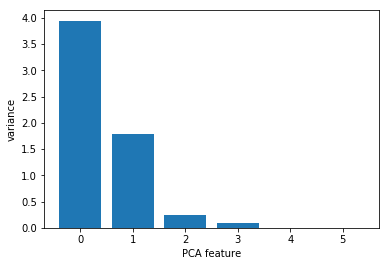

In [213]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


**We can conclude that the fish data set is intrinsically 2-dimensional**

Compare the variance of the unscaled samples

In [214]:
np.var(pd.DataFrame(samples))

0    143403.498893
1       125.952257
2       146.728559
3       172.119482
4       105.893799
5         4.430954
dtype: float64

To the variance of the scaled samples

In [215]:
np.var(pd.DataFrame(scaler.fit_transform(samples)))

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
dtype: float64

The scaled samples are, well, scaled. We have manipulated them precisely to make their variance 1.

**But one we use PCA to**
- rotate them so their "axis of variance is parallel to our vector space axes"
- shift them so their "mean" is centered over the origin of our vector space

Then their PCA variance is no longer strictly scaled

In [216]:
np.var(pd.DataFrame(pipeline.fit_transform(samples)))

0    3.899742
1    1.760026
2    0.240374
3    0.099171
4    0.000557
5    0.000130
dtype: float64

In [221]:
for e in enumerate(pca.explained_variance_):
    print(e)

(0, 3.9461674646321607)
(1, 1.7809790651198485)
(2, 0.24323559284845647)
(3, 0.10035184512633738)
(4, 0.0005631409961594293)
(5, 0.00013146270561268793)


**recall that pca alone, simply shifts and rotates the data**

In [233]:
versicolor_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


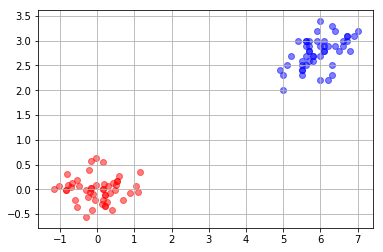

In [232]:
# plot raw versicolor sepal length and width
plt.scatter(versicolor_df.sepal_length, 
            versicolor_df.sepal_width,
           c = 'b',
           alpha = .5)

# plot the PCA transformed versicolor sepal length and width
model = PCA()
pca_samples = model.fit_transform(
    versicolor_df[['sepal_length', 'sepal_width']]
)
plt.scatter(pca_samples[:,0], pca_samples[:,1],c = 'r', alpha = .5)

plt.grid()
plt.show()